In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Getting distribution values using scipy

The scipy stats package contains a lot of useful distributions. Here, you can compute z and t statistics, etc. Normal distribution is given in scipy.stats.norm, while the t distribution is given as stats.

In [17]:
# Cumulative probability P(X<120) where X ~ N(100, 10^2)
print("P(X<120) where X ~ N(100, 10^2) = %.3f" % stats.norm.cdf(120, loc=100, scale=10))

# Calculate value
print("x for which P(X < x = 0.97) = %.1f" % stats.norm.ppf(0.97, loc=100, scale=10))

P(X<120) where X ~ N(100, 10^2) = 0.977
x for which P(X < x = 0.97) = 118.8


In [18]:
# Cumulative probability P(X<120) where X ~ N(100, 10^2)
print("P(X<120) where X ~ t with df = 10, mean = 100 and sigma = 10) = %.3f" % stats.t.cdf(120, df=10, loc=100, scale=10))

# Calculate value
print("x for which P(X < x = 0.97) = %.1f" % stats.t.ppf(0.97, df=10, loc=100, scale=10))

P(X<120) where X ~ t with df = 10, mean = 100 and sigma = 10) = 0.963
x for which P(X < x = 0.97) = 121.2


# Linear regression

Let us first read the data from the csv file into a Pandas "DataFrame" using Pandas' built in parsers.

In [2]:
df = pd.read_table("co2_temp_yr.csv", delimiter=",")
print(df)

    Year     CO2 ppm  Global Temp
0   1965  320.044167          -10
1   1966  321.383333           -4
2   1967  322.157500           -1
3   1968  323.045000           -5
4   1969  324.624167            6
5   1970  325.680000            4
6   1971  326.320000           -7
7   1972  327.453333            2
8   1973  329.676667           15
9   1974  330.176667           -7
10  1975  295.202500           -1
11  1976  332.053333          -12
12  1977  333.781667           14
13  1978  335.409167            5
14  1979  336.781667           11
15  1980  338.679167           22
16  1981  340.100000           28
17  1982  341.436667            9
18  1983  343.025000           27
19  1984  307.350000           11
20  1985  346.041667            8
21  1986  347.384167           14
22  1987  349.160833           28
23  1988  351.563333           35
24  1989  353.067500           24
25  1990  354.346667           39
26  1991  355.566667           38
27  1992  356.382500           19
28  1993  357.

## Quick exploration

The DataFrame contains a lot of useful convenience functions. For example, df.describe() gives you a quick summary of useful information! See more at http://pandas.pydata.org/pandas-docs/stable/10min.html.

In [3]:
df.describe()

,Year,CO2 ppm,Global Temp
count,46.000000,46.000000,46.000000
mean,1987.500000,349.592391,26.108696
std,13.422618,23.034181,23.586463
min,1965.000000,295.202500,-12.000000
25%,1976.250000,330.645834,6.500000
50%,1987.500000,350.362083,25.500000
75%,1998.750000,367.907500,44.250000
max,2010.000000,389.844167,66.000000


You can also do quick plotting of the data. The results are not aesthetically the best, but it is useful for a quick visual of the data

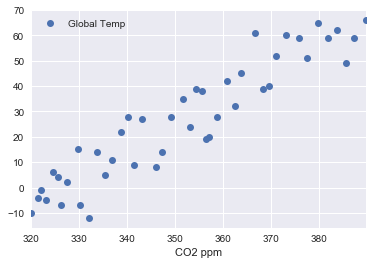

In [4]:
ax = df.plot(x="CO2 ppm", y="Global Temp", style='o')

Much nicer results can be obtained using a dedicated plotter like seaborn.

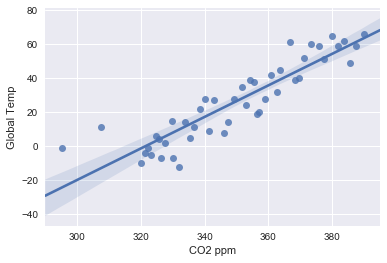

In [5]:
ax = sns.regplot(x="CO2 ppm", y="Global Temp", data=df)

## Performing the regression

We will use scipy's built in regression analysis here. There are quite a number of options out there, e.g., statsmodels, scikit-learn, etc., that you can explore.

In [6]:
res = stats.linregress(df["CO2 ppm"], df["Global Temp"])
print("Slope = %.3f" % res.slope)
print("Intercept = %.3f" % res.intercept)
print("R = %.3f" % res.rvalue)
print("Std error = %.3f" % res.stderr)

Slope = 0.928
Intercept = -298.244
R = 0.906
Std error = 0.065


# ANOVA anslysis

We can also perform ANOVA analysis using pandas + scipy. Again, let us now read the polymer.csv data into a DataFrame.

In [7]:
df = pd.read_table("polymer.csv", delimiter=",", index_col=0)
print(df)

         0    1    2    3    4    5
-1.00  8.2  8.0  8.2  7.9  8.1  8.0
-0.75  8.3  8.4  8.3  8.2  8.3  8.1
-0.50  8.9  8.7  8.9  8.4  8.3  8.5
 0.00  8.5  8.7  8.7  8.7  8.8  8.8
 0.50  8.8  9.1  9.0  8.7  8.9  8.5
 1.00  8.6  8.5  8.6  8.7  8.8  8.8


Each row in the above data is one group.

In [8]:
print(stats.f_oneway(*df.as_matrix()))

F_onewayResult(statistic=18.882352941176471, pvalue=1.8177090258544406e-08)
